# El algoritmo hierarchical clustering
En español, agrupamiento jerárquico, es un algoritmo de agrupación de datos basado en el cómputo de las distancias entre individuos para, posteriormente, calcular entre individuos y grupos y, finalmente, entre grupos en sí. 

La decisión de qué distancia usar es una de las más importantes en este tipo de algoritmos, aunque está bastante aceptado usar la **distancia euclidiana**. 

![img](https://i.imgur.com/wlnS1Bx.png)

En la parte inferior, cada uno de los invididuos constituye a un cluster en sí. En la imagen se observan 14 clusters. A medida que se vayan subiendo los clusters se van agrupando entre ellos.

Cuando y = 1, el individuo 12 y 14 estan en la misma rama, es decir, están en el mismo clusters, han sido los primeros en unirse porque su distancia euclidiana era la maś pequeña


### Cómo ajustar este tipo de algoritmo

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

df = pd.read_csv(r"/home/flavioisay/MEGAsync/Python para data science y big data esencial/base_datos_2008.csv", nrows = 1e4) # Se seleccionan pocas filas porque se generarán muchas distancias, se generará una matriz de 10 mil por 10 mil 
# Se ocupan más archivos con big data se ocupan usar otras plataformas porque se forma objetos demasiado gradnes para ser calculados en una computadora normal
newdf = df[['AirTime','DepDelay']].dropna() # Seleccionar un subset con dos columnas y se eliminan los casos perdidos

In [8]:
# No se ejecuta hasta después
# Probando con mas variables
newdf = df[['AirTime','Distance','TaxiOut','ArrDelay','DepDelay']].dropna()

In [11]:
clstr = AgglomerativeClustering(n_clusters = 20) # Escoger 5 clusters, con mas variables escoger 10 clusters
clstr.fit(newdf) # Se ajusta el modelo
# No se necesitan mas parametros para ajustar el modelo

### Tipos de distancias para ajustar, la mas popular es la euclideana
## Usar otro tipo de distancia necesita aplicar un criterio
## Si se agrega la norma L1, se tendra que agregar un linkage distinto, como complete o average
# euclidean / L1 / L2 / manhattan / cosine / precomputed
# affinity="L1",linkage='complete'

AgglomerativeClustering(n_clusters=20)

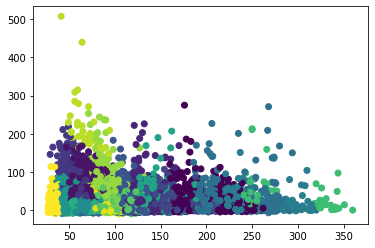

In [12]:
# Visualizar los resultados
import matplotlib.pyplot as plt
plt.scatter(newdf['AirTime'],newdf['DepDelay'],c = clstr.fit_predict(newdf))
plt.show() 
# Se observan como han quedado distribuidos los grupos
# Al estar familiarizado con otros tipos de clustering como kmeans se analiza que las estructuras de separacion observadas no son posibles con ese tipo de algoritmo
# Aqui se agrupan de una manera particular

# Con mas variables hay mucho solapamiento, probar con distintos numeros de variable y clusters para ver como evolucionan graficamente

In [15]:
# Hacer predicciones
newdf = pd.read_csv(r"/home/flavioisay/MEGAsync/Python para data science y big data esencial/base_datos_2008.csv", nrows = 2e4)[['AirTime','DepDelay']].dropna()
clstr.fit_predict(newdf)[0:10]
# Se obtiene un array donde se asigna a los primeros 10 individuos a que grupo pertenece
# Este metodo es muy interesante e intuitivo pero es muy costoso computacionalmente

array([3, 3, 7, 7, 5, 5, 4, 8, 7, 7])